<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет! Меня зовут Никита Бережнов, и я буду проверять твой проект. Спасибо за проделанную работу! Предлагаю общаться на «ты». Моя основная цель поделиться своим опытом и помочь тебе стать профессионалом в IT сфере.</font>

<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Все отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Комментарий ревьюера: </b> Сделано все правильно, однако есть рекомендации, на что стоит обратить внимание
</div>

<div class="alert alert-block alert-danger">
<b>❌ Комментарий ревьюера: </b> Есть недочеты, без их отработки проект не будет принят
</div>

---

<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

<font color='blue'>Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:</font>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Хорошая работа. Проведён анализ данных. Удачно подобраны визуализации.  Увидел выводы к каждому этапу работы. Но есть маленькие недочёты. Их нужно исправить. 
Осталось совсем чуть-чуть. Всегда готов ответить на твои вопросы.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Никита, привет! Большое спасибо за проверку моего проекта. Все правки изучила и исправила! Очень ценны все твои комментарии и подсказки по ходу проекта! 
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> Спасибо за интерес к проекту. Исправлены все замечания и рекомендации! 
Принято. Желаю дальнейших успехов в учёбе и на работе.
</div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Описание данных<br>
•	id — уникальный идентификатор скважины;<br>
•	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);<br>
•	product — объём запасов в скважине (тыс. баррелей).<br>

Условия задачи:<br>
•	Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).<br>
•	При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.<br>
•	Бюджет на разработку скважин в регионе — 10 млрд рублей.<br>
•	При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.<br>
•	После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.<br>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Хорошее введение. Понятна цель работы
</div>

## Загрузка и подготовка данных

In [1]:
# импорт библиотек 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # графики
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split # деление выборки 

from sklearn.linear_model import LinearRegression # линейная регрессия 
from sklearn.metrics import mean_squared_error #среднеквадратичная ошибка (RSME)
from sklearn.metrics import mean_absolute_error # средняя абсолютная ошибка (MAE)

from numpy.random import RandomState
from scipy import stats as st

Считываем данные:

In [2]:
try:
    df_0 = pd.read_csv(r'C:\Users\tanch\Desktop\data science\проекты\Машинное обучение в бизнесе\geo_data_0.csv', sep=',')
    df_1 = pd.read_csv(r'C:\Users\tanch\Desktop\data science\проекты\Машинное обучение в бизнесе\geo_data_1.csv', sep=',')
    df_2 = pd.read_csv(r'C:\Users\tanch\Desktop\data science\проекты\Машинное обучение в бизнесе\geo_data_2.csv', sep=',')
except:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv', sep=',') 
    df_1 = pd.read_csv('/datasets/geo_data_1.csv', sep=',')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv', sep=',')

Просмотрим первые пять строк каждой таблицы, а также общую информацию о данных:

In [3]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Проверим на дубликаты:

In [12]:
print('Количество дубликатов в датасете 0:', df_0.duplicated().sum())
print('Количество дубликатов в датасете 1:', df_1.duplicated().sum())
print('Количество дубликатов в датасете 2:', df_2.duplicated().sum())

Количество дубликатов в датасете 0: 0
Количество дубликатов в датасете 1: 0
Количество дубликатов в датасете 2: 0


Дубликатов нет.

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b> Хорошо. 
</div>

В каждой таблице присутсвуют 4 столбца, по 10 тыс. записей в каждой таблице. Названия столбцов корректны. Пропусков в данных нет. Поле "id" имеет тип данных object. Остальные столбцы  - тип данных float64.

Так как для обучения модели столбец "id" не несет особой значимости, исключим его из обучения. Основные показатели важные для обучения находятся в столбцах "f0", "f1", "f2" и "product"

In [13]:
df_0 = df_0.drop('id', axis=1)
df_1 = df_1.drop('id', axis=1)
df_2 = df_2.drop('id', axis=1)

<div class="alert alert-block alert-danger">
<b>❌ Комментарий ревьюера: </b> Теряется точность при дальнейших вычислениях. Тем более линейная регрессия предскажет дробные числа. Поэтому предлагаю оставить как есть
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Вернулась к исходному формату
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> 👍
</div>

Построим графики для отображения столбца "product"

In [14]:
# функция для построения графика по product для 3 регионов
def hist(df, i):
    df[df.columns.values[i]].hist(bins=50)
    plt.xlabel('count')
    plt.ylabel('frequency')
    plt.title(df.columns.values[i])
    plt.title('product')
    plt.legend(('product'), loc='upper right')
    plt.show()

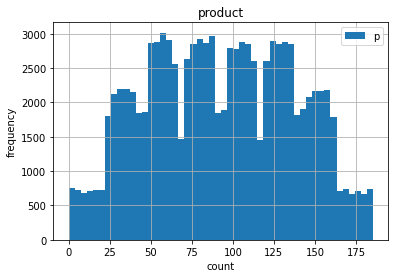

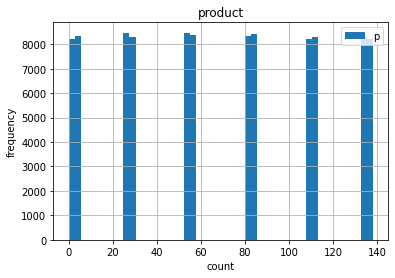

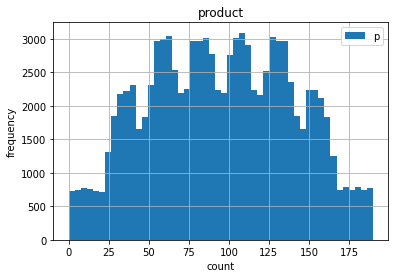

In [15]:
hist(df_0, 3)
hist(df_1, 3)
hist(df_2, 3)

На всех трех графиках нет стандартного «колокола» распределения данных.  С помощью Bootstrap приведем его нормальному виду. По описанию видно, что график для первого и третьего месторождения значения среднего и медианы практически равны между собой: 2,50 и 2,51 для первого месторождения. И 2,49 и 2,48 для третьего месторождения. Во втором месторождении среднее и медиана отличаются друг от  друга: 2,49 и 2,01 соответственно. Это говорит о том, что во втором наборе данных есть больший диапазон между значениями. Стандартное отклонение во втором наборе 45,94. В первом и третьем наборе данные более равномерные (это видно и по графику и по описанию). Стандартное отклонение: 44,3 и 44,7 соответственно. По количеству запасов – третье месторождение самое большое. 

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Спасибо за вывод. Движемся дальше
</div>

## Обучение и проверка модели

Разобем каждый набор данных на целевой признак и признаки:

In [16]:
features_0 = df_0.drop(['product'],axis=1)
target_0 = df_0['product']

features_1 = df_1.drop(['product'],axis=1)
target_1 = df_1['product']

features_2 = df_2.drop(['product'],axis=1)
target_2 = df_2['product']

Чтобы не прописывать каждый раз параметр "random_state", зафиксируем его:

In [17]:
rnd = np.random.RandomState(12345)

Подготовим обучающую и валидную выборки в соотношении 75:25

In [18]:
train_features_0, valid_features_0, train_target_0, valid_target_0 = train_test_split(features_0, 
                                                                                      target_0, 
                                                                                      test_size=.25, 
                                                                                      random_state = rnd)

In [19]:
train_features_1, valid_features_1, train_target_1, valid_target_1 = train_test_split(features_1, 
                                                                                      target_1, 
                                                                                      test_size=.25, 
                                                                                      random_state = rnd)

In [20]:
train_features_2, valid_features_2, train_target_2, valid_target_2 = train_test_split(features_2, 
                                                                                      target_2, 
                                                                                      test_size=.25, 
                                                                                      random_state =  rnd)

Обучим с помощью модели Линейной регрессии на каждом наборе тренировочных выборок. В итоге получим три предсказания. Также расчитаем среднеквадратичную ошибку (RSME) и среднюю абсолютную ошибку (MAE) по каждому предсказанию модели:

Обучаем модель на первой тестовой выборке. Также считаем RSME и MAE: 

In [21]:
model_reg_0=LinearRegression().fit(train_features_0,train_target_0)
prediction_0=model_reg_0.predict(valid_features_0)
prod_mean_0 = round(prediction_0.mean(), 4).astype('float')
RMSE_0 = round(np.sqrt(mean_squared_error(prediction_0,valid_target_0)), 4).astype('float')
MAE_0 = round(mean_absolute_error(prediction_0,valid_target_0), 4).astype('float')

Результаты обучения на первой тестовой выборке:

In [22]:
print('Результат обучения на первой тестовой выборке:')
print()
print('Средний запас сырья:', prod_mean_0)
print('RMSE:', RMSE_0)
print('MAE:', MAE_0)

Результат обучения на первой тестовой выборке:

Средний запас сырья: 92.5926
RMSE: 37.5794
MAE: 30.9196


Обучаем модель на второй тестовой выборке. Также считаем RSME и MAE: 

In [23]:
model_reg_1=LinearRegression().fit(train_features_1,train_target_1)
prediction_1=model_reg_1.predict(valid_features_1)
prod_mean_1 = round(prediction_1.mean(), 4).astype('float')
RMSE_1 = round(np.sqrt(mean_squared_error(prediction_1,valid_target_1)), 4).astype('float')
MAE_1 = round(mean_absolute_error(prediction_1,valid_target_1), 4).astype('float')

Результаты обучения на второй тестовой выборке:

In [24]:
print('Результат обучения на второй тестовой выборке:')
print()
print('Средний запас сырья:', prod_mean_1)
print('RMSE:', RMSE_1)
print('MAE:', MAE_1)

Результат обучения на второй тестовой выборке:

Средний запас сырья: 68.77
RMSE: 0.8897
MAE: 0.7173


Обучаем модель на третьей тестовой выборке. Также считаем RSME и MAE:

In [25]:
model_reg_2=LinearRegression().fit(train_features_2,train_target_2)
prediction_2=model_reg_2.predict(valid_features_2)
prod_mean_2 = round(prediction_2.mean(), 4).astype('float')
RMSE_2 = round(np.sqrt(mean_squared_error(prediction_2,valid_target_2)), 4).astype('float')
MAE_2 = round(mean_absolute_error(prediction_2,valid_target_2), 4).astype('float')

Результаты обучения на третьей тестовой выборке:

In [26]:
print('Результат обучения на третьей тестовой выборке:')
print()
print('Средний запас сырья:', prod_mean_2)
print('RMSE:', RMSE_2)
print('MAE:', MAE_2)

Результат обучения на третьей тестовой выборке:

Средний запас сырья: 95.0875
RMSE: 39.958
MAE: 32.7961


Сведем результаты в общую таблицу:

In [27]:
data_result={'df_0':np.array([prod_mean_0, RMSE_0, MAE_0]),
          'df_1':np.array([prod_mean_1, RMSE_1, MAE_1]),
          'df_2':np.array([prod_mean_2, RMSE_2, MAE_2])}

In [28]:
data_result=pd.DataFrame(data_result,index=['Средний запас сырья, тыс.бареллей','RMSE','MAE'])
display(data_result)

,df_0,df_1,df_2
"Средний запас сырья, тыс.бареллей",92.5926,68.7700,95.0875
RMSE,37.5794,0.8897,39.9580
MAE,30.9196,0.7173,32.7961


<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Согласен с результатами
</div>

Средний запас предсказанного сырья практически соответствует средним значениям запасов первоначальных данных:<br>
Первоначальные данные/Предсказанные данные:<br>

In [29]:
print(f"1 месторождение: {round(df_0['product'].mean(), 4)}/{prod_mean_0}")
print(f"2 месторождение: {round(df_1['product'].mean(), 4)}/{prod_mean_1}")
print(f"3 месторождение: {round(df_2['product'].mean(), 4)}/{prod_mean_2}")

1 месторождение: 92.5/92.5926
2 месторождение: 68.825/68.77
3 месторождение: 95.0/95.0875


Самое низкое значение метрик RMSE/MAE  - 0,8897/0,7173 достигнуто во втором месторождении. Определим для этого месторождения коэффициент корреляции: 

In [30]:
display(df_1.corr()) 

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


По результатам коэффициента корреляции видно, что в данных между показателем f2 и целевым признаком есть линейная зависимость (коэффициент 0,999397). Для других показателей такой явной связи нет, кроме того, что уменьшение одного показателя, ведет к увеличению другого (отрицательный коэффициент).

Самый высокие показатели метрик RMSE/MAE  - 37,5794/30,9196 по данным первого месторождения. Третье месторождение имеет небольшое отставание от первого месторожения. Изучим их коэффициенты корреляции:

In [31]:
display(df_0.corr())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [32]:
display(df_2.corr())

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Исходя из результатов коэффициента корреляции видно, что для обоих месторождений нет прямой зависимости между показателями и целевым признаком (модули близки к нулю). Связь между f2 и целевым признаком (которая явно линейная у второго месторождения) не такая очевидная. 

Исходя из результатов среднеквадратичной ошибки предсказания и целевого признака можно сделать вывод, что лучше всего предсказано месторождение df_1. При этом у этого месторождения меньше всего средний запас сырья. Остальные месторождения (df_0, df_2) предсказаны с большой ошибкой. Можно преподположить, что из-за того, что данные не соответсвуют нормальному распределению, значения среднего запаса могут быть другими. Используем технологию Bootstrap, чтобы получить нормальное распределение данных, а также применим статистический функционал.

<div class="alert alert-block alert-warning">
<b>⚠️ Комментарий ревьюера: </b>  Низкий RMSE не из-за распределения целевого признака. Здесь ключевую роль играет сильная линейная зависимость между целевой переменной и одним из признаков. Предлагаю это проверить с помощью коэффициента корреляции.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Определила и описала коэффициент корреляции для второго месторождения. Также сравнила для двух других месторождений
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> 👌🏻
</div>

## Подготовка к расчёту прибыли

Для расчета прибыли и рисков необходимо ввести константы, согласно требованию задачи:

Условия задачи:<br>
• При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.<br>
• Бюджет на разработку скважин в регионе — 10 млрд рублей.<br>
• При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.<br>
• После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.<br>

n = 500 (исследование в 500 точек региона)<br>
N_BEST = 200 (200 лучших точек для разработки)<br>
BUDGET = 10*10**9 (бюджет на разработку скважин в регионе — 10 млрд рублей)<br>
PRICE_BAR = 450*10**3 (цена за 1000 баррелей сырья)<br>
NUM_DIV = 10**9 (делитель числа для упрощения восприятия цифр, равен 1 млрд)<br>

Определим минимальный объем сырья, при котором месторождение будет безубыточным. В расчете используем условие, что разработка ведется в 200 лучших точках: 

In [33]:
N_BEST = 200
BUDGET = 10*10**9
PRICE_BAR = 450*10**3
profit_0 = BUDGET / N_BEST / PRICE_BAR
print('Минимальный объем сырья для безубыточной разработки: {:.2f} тыс. баррелей'.format(profit_0))

Минимальный объем сырья для безубыточной разработки: 111.11 тыс. баррелей


<div class="alert alert-block alert-warning">
<b>⚠️ Комментарий ревьюера: </b> Константы в python принято задавать в верхнем регистре. Например, PI=3.14. Предлагаю это поправить.

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html

https://github.com/earlgreyness/python-code-conventions
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправила регистр констант
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> Да, спасибо
</div>

In [34]:
display(data_result)

,df_0,df_1,df_2
"Средний запас сырья, тыс.бареллей",92.5926,68.7700,95.0875
RMSE,37.5794,0.8897,39.9580
MAE,30.9196,0.7173,32.7961


Сравнивая значения среднего запаса сырья в трех месторождениях и минимального объема, достаточного для его разработки, можно сделать вывод, что для каждого месторождения среднего объема сырья недостаточно для его разработки. 

## Расчёт прибыли и рисков 

Преобразуем полученные предсказания модели для каждого месторождения, а также целевые в Series:

In [35]:
target_0 = pd.Series(valid_target_0)
prediction_0 = pd.Series(prediction_0)

target_1 = pd.Series(valid_target_1)
prediction_1 = pd.Series(prediction_1)

target_2 = pd.Series(valid_target_2)
prediction_2 = pd.Series(prediction_2)

Напишем функцию, которая расчитает прибыль по выбранным сважинам и предсказаниям модели. 

In [36]:
def profit(target, prediction, count):
    prediction_top = prediction.sort_values(ascending=False)
    selected = target[prediction_top.index][:count]
    return PRICE_BAR * selected.sum() - BUDGET

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера️: </b> Функция расчёта прибыли написана верно.
</div>

"Вложим" ее в функцию Bootstrap и рассчитаем статистические показатели для скважин. В данном случае у нас будет ТОП-200 скважин:

In [37]:
NUM_DIV = 10**9
def bootstrap (target, prediction):
    values = []
    for i in range(1000):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=rnd)
        pred_subsample = prediction[target_subsample.index]
        values.append(profit(target_subsample, pred_subsample, 200))
    risk = 0.025
    values = pd.Series(values)
    lower = values.quantile(risk)
    high = values.quantile(0.975)
    confidence_interval = (lower, high)
    mean = values.mean()
    
    data = pd.DataFrame(data=[mean / NUM_DIV, lower / NUM_DIV, high / NUM_DIV, confidence_interval, (values < 0).mean()], 
                        index=['Средняя прибыль региона, млрд.рублей', 
                               '2,5%-квантиль, млрд.рублей', 
                               '97,5%-квантиль, млрд.рублей', 
                               'Доверительный интервал', 
                               'Риск убытка'], 
                        columns=['Результат'], 
                        dtype=None, 
                        copy=False)

    #print("Средняя прибыль региона: {:.2f} млрд.рублей".format(mean / NUM_DIV))
    #print("2,5%-квантиль: {:.2f} млрд.рублей".format(lower / NUM_DIV))
    #print("97,5%-квантиль: {:.2f} млрд.рублей".format(high / NUM_DIV))
    #print("Доверительный интервал: ", confidence_interval)
    #print("Риск убытка:", (values < 0).mean())
    
    display(data)

<div class="alert alert-block alert-warning">
<b>⚠️ Комментарий ревьюера: </b>  Предлагаю использовать константы, написанные выше
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправила регистр констант
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> 👌🏻
</div>

Применим технологию Bootstrap для каждого месторожения:

In [38]:
print("Месторождение №1:")
bootstrap(target_0, prediction_0)

Месторождение №1:


,Результат
"Средняя прибыль региона, млрд.рублей",0.423897
"2,5%-квантиль, млрд.рублей",-0.076188
"97,5%-квантиль, млрд.рублей",0.957847
Доверительный интервал,"(-76187813.89036272, 957846531.951783)"
Риск убытка,0.048


In [39]:
print("Месторождение №2:")
bootstrap(target_1, prediction_1)

Месторождение №2:


,Результат
"Средняя прибыль региона, млрд.рублей",0.513257
"2,5%-квантиль, млрд.рублей",0.108067
"97,5%-квантиль, млрд.рублей",0.928574
Доверительный интервал,"(108066895.23396212, 928574439.2324963)"
Риск убытка,0.006


In [40]:
print("Месторождение №3:")
bootstrap(target_2, prediction_2)

Месторождение №3:


,Результат
"Средняя прибыль региона, млрд.рублей",0.38112
"2,5%-квантиль, млрд.рублей",-0.142801
"97,5%-квантиль, млрд.рублей",0.893381
Доверительный интервал,"(-142800630.08786878, 893380565.7504003)"
Риск убытка,0.074


В исследовании были использованы три дата сета.<br> 
Был проведен исследовательский анализ данных:<br>
- соответствие типа и формата данных<br>
- наличие пропусков и дубликатов<br>
Определили, что распределение признаков не соответствуют нормальному распределению.<br>
Определены признаки и целевой признак для обучения модели. Для предсказания объёмов нефти в скважинах использована линейная модель.<br> 
Для расчетов рисков и прибыли по каждому месторождению была применена технология Bootstrap с 1000 выборок.<br> 
В результате нашли:<br>
- среднюю прибыль региона<br>
- 95% доверительный интервал для среднего объема нефти в скважинах<br>
- 2,5% и 97,5% квантили<br>
- риск убытка<br>
Основной критерий - вероятность убытков - 2.5 %. Месторождение №2 имеет самую низкую вероятность убытков, всего 0.6%. И более узкий доверительный интервал, и соответственно более высокую среднюю прибыль.<br>
Остальные два месторождения не проходят по основному критерию: 4,8% и 7,4% вероятность убытков соответственно. 

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера: </b> Да, спасибо за вывод. Удобно отслеживать результат выполнения работы
</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера:</b>
Мне очень понравилась твоя работа. Спасибо тебе большое, за хорошее оформление проекта и выводы к каждому этапу работы.
Чувствуется уверенное знание материала и владение питоном в целом. 
</div>
<font color='blue'><b>Но нужно кое-что поправить:</b></font>
<div class="alert alert-block alert-danger">
<ul>1) Не округлять значения таргетов</ul>
</div>

<font color='blue'><b>Осталось совсем немного, буду ждать твою работу на повторное ревью 🙂</b></font>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо за проверку проекта! 
</div>

<div class="alert alert-block alert-success">
<b>✔️ Комментарий ревьюера v2: </b> Спасибо за интерес к проекту. Исправлены все замечания и рекомендации! 
Принято. Желаю дальнейших успехов в учёбе и на работе.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован